In [7]:
import os,sys
import pandas
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime 
%matplotlib inline

## Loading data

The script requires to have the repo "theinformer" in the same working directory as the "thefactory" repo.

In [4]:
data = pd.read_csv("../../theinformer/data/wikipedia-islamist-terror-attacks/all.csv")

In [14]:
data

,Location,Date,Description,Deaths,Injuries
0,Saudi Arabia,20 November 1979,"The Grand Mosque seizure, in Mecca by the Ikhwan.",244,180
1,Syria,29 November 1981,"The 1981 Azbakiyah bombing, in Damascus, by th...",200,NaN
2,Lebanon,"April 18, 1983","The 1983 U.S. Embassy bombing, in Beirut by th...",63,120
3,Lebanon,"October 23, 1983",The 1983 Beirut barracks bombing by the Islami...,307,75
4,Kuwait,"December 12, 1983",The 90-minute coordinated 1983 Kuwait bombings...,5,0
5,Lebanon,"September 20, 1984",The 1984 United States embassy annex bombing i...,24,0
6,Indonesia,"January 21, 1985",The Buddhist Borobudur temple in Java was dama...,0,0
7,Spain,"April 12, 1985",1985 El Descanso bombing.,18,82
8,Greece,"June 14, 1985",TWA Flight 847 hijacking.,1,0
9,Denmark,22 July 1985,1985 Copenhagen bombings,1,26


# Conversion to datetime

It seems there are just two date formats, we can discriminate from one another by the presence of a comma.

Corrigendum: there are 3 at least, one in the format 'November 15–20, 2003'. We take the first day as reference time

There are other 3 execptions, I deliberately do not consider them since day of occurrence is missing

In [81]:
def first_data_format(t):
    return datetime.datetime.strptime(t,"%d %B %Y")

def second_data_format(t):
    return datetime.datetime.strptime(t,"%B %d, %Y")


def convert_date(t):
    if "," not in t:    
        return first_data_format(t)
    else:
        #correction for the day1-day2 format
        if "–" in t:
            t = t.split(",")
            t[0] = t[0].split("–")[0] #remove second day
            t = t[0] +"," + t[1]
        return second_data_format(t)
    

In [146]:
dates_time_series = data["Date"]

dates_final = []
for t in dates_time_series:
    if dates_time_series[dates_time_series==t].index[0] in [187,270,292,412]: continue
    dates_final.append(convert_date(t))
    
dates_final = np.array(dates_final)

# Plotting

High clusterization in recent years

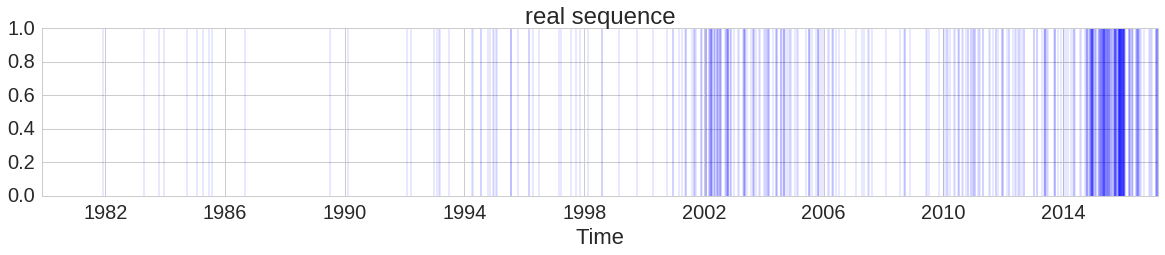

In [127]:
sns.set_context("notebook", font_scale=2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,3))

ax.set_title("real sequence")

for t in dates_final:
    ax.axvline(t, ymin=0, ymax=1, alpha=0.1)
plt.xlabel("Time")

# Reshuffling

I apply a reshuffling technique in which I keep the same inter-event waiting time distribution, but I assing occurrence time at random. In this way I destroy temporal correlations.
Let's start by computing the inter-time distrib.

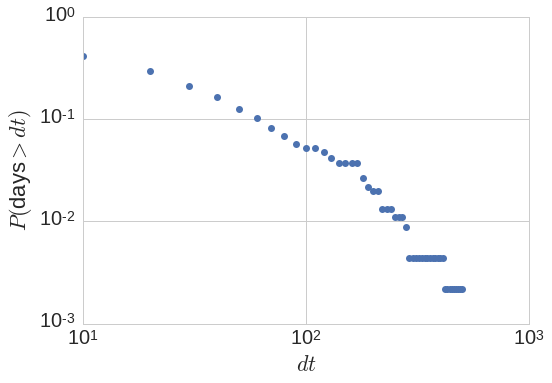

In [169]:
dt_seq = dates_final[1:] - dates_final[:-1]
dt_seq = [dt.days for dt in dt_seq]

values, bins = np.histogram(dt_seq, bins=np.arange(0,365*2,10))
norm = float(np.sum(values))
values=values/norm

cumul = np.cumsum(values[::-1])[::-1]

plt.loglog(bins[:-1], cumul,'o')
plt.xlabel("$dt$")
plt.ylabel("$P($days$>dt)$")

let's create a new time seq by randomizing inter-event times

In [159]:
dt_seq_rand = np.random.permutation(dt_seq)
t0 = dates_final[0]

dates_random = [t0]
for dt in dt_seq_rand:
    t0 = t0 + datetime.timedelta(days=int(dt))
    dates_random.append(t0)

Randomized clusters here and there...

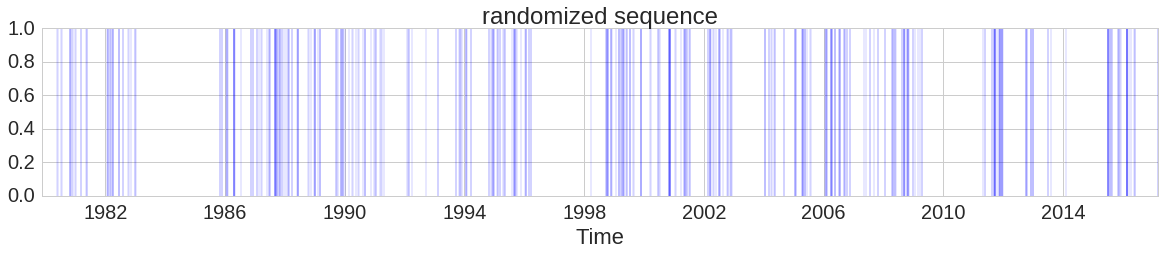

In [163]:
sns.set_context("notebook", font_scale=2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,3))

ax.set_title("randomized sequence")

for t in dates_random:
    ax.axvline(t, ymin=0, ymax=1, alpha=0.1)
plt.xlabel("Time")

So now:

- Clusterization metrics in time? More clustered nowadays then before
- See that clusterization is more uniform in the random case
- Should we divide the time series in decades? Should we divide by continents?
